--------

-----

-----

-----

-----


# Table of Contents 


 * _Basics of Image Analysis_
 * _Extracting Features from Images_
 * _Transfer Learning with Deep Networks_

--------

-----

-----

-----

-----








---

---

---

### <center> Basics of Image Analysis (low and mid-level image processing) </center>



##### Image enhancement techniques include those to tailor the images for further image analysis and ML applications. For instance, removing noise, sharpening or brighteninig an image makes it easier to identify features.

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('sample_cat.jpg')
#openCV current version reads colors in the order of BGR; converting to RGB to plot with matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# image is a 3d-array of shape representing height, width, number of channels
rows, cols, channel = img.shape

img.shape

(500, 439, 3)

In [4]:
#total number of pixels
img.size

658500

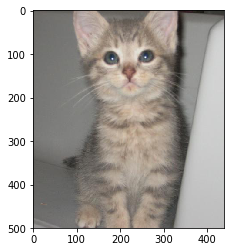

array([[[ 92,  91,  87],
        [ 92,  91,  87],
        [ 92,  91,  87],
        ...,
        [ 55,  56,  51],
        [ 55,  56,  51],
        [ 55,  56,  51]],

       [[ 93,  92,  88],
        [ 93,  92,  88],
        [ 93,  92,  88],
        ...,
        [ 54,  55,  50],
        [ 54,  55,  50],
        [ 54,  55,  50]],

       [[ 96,  95,  91],
        [ 96,  95,  91],
        [ 96,  95,  91],
        ...,
        [ 54,  55,  50],
        [ 54,  55,  50],
        [ 54,  55,  50]],

       ...,

       [[154, 152, 153],
        [153, 151, 152],
        [152, 150, 151],
        ...,
        [190, 188, 189],
        [191, 189, 190],
        [191, 189, 190]],

       [[154, 152, 153],
        [153, 151, 152],
        [152, 150, 151],
        ...,
        [190, 188, 189],
        [190, 188, 189],
        [191, 189, 190]],

       [[153, 151, 152],
        [153, 151, 152],
        [152, 150, 151],
        ...,
        [190, 188, 189],
        [190, 188, 189],
        [190, 188, 189]]

In [5]:
#render an image
plt.imshow(img)
plt.show()
img

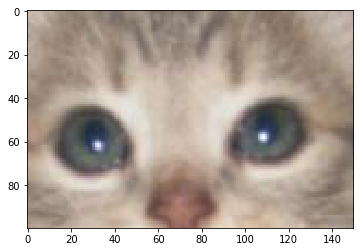

In [6]:
#accesing regions of an image
plt.imshow(img[50:150, 150:300])
plt.show()

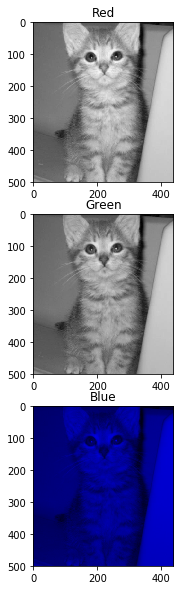

In [7]:
#displaying RGB channels separately and how the values are being processed
figure, ax = plt.subplots(3, 1, figsize=(20,10))

ax[0].set_title('Red')
ax[0].imshow(img[:, :, 0], cmap='gray')
ax[1].set_title('Green')
ax[1].imshow(img[:, :, 1], cmap='gray')
#showing blue channel in color by setting the rest of the channels to 0
img1 = img.copy()
img1[:,:,0:2] = 0
ax[2].set_title('Blue')
ax[2].imshow(img1)
plt.show()

#### 1. Geometric transformations (further techniques: cropping, scaling(resizing), perspective transformation)
##### Image rotation for a given angle

##### Rotation Matrix computation: 

<img src="http://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/91ff2b9b1db0760f4764631010749e594cdf5f5f.png", width=300>

<img src="http://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/383c254fc602c57a059a8296357f90fdf421aee7.png", width=100>

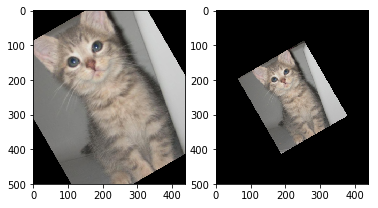

In [8]:
#calculating the center to rotate around it
center = (cols/2, rows/2)
 
# rotate the image by 30 degrees around arbitrary point, in this case around the center
# preserving the size by giving a scaling factor of 1 or resizing the rotated image
M1_rotate = cv2.getRotationMatrix2D(center, 30, 1.0)
#0.5 rescaled
M2_rotate = cv2.getRotationMatrix2D(center, 30, 0.5)
img_rotated1 = cv2.warpAffine(img, M1_rotate, (cols, rows))
img_rotated2 = cv2.warpAffine(img, M2_rotate, (cols, rows))

figure, ax = plt.subplots(1,2)
ax[0].imshow(img_rotated1)
ax[1].imshow(img_rotated2)

plt.show()

######  Affine transformation: preserving the parallel lines

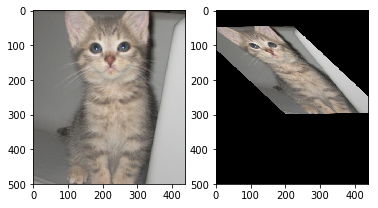

In [9]:
# selecting 3 arbitrary points on initial image and their future positions on output image
inpos = np.float32([[0,500],[20,100],[400,10]])
outpos = np.float32([[200,300],[0,100],[200,50]])

#computing the transformation matrix of size 2x3
M_affine = cv2.getAffineTransform(inpos,outpos)
img_affine = cv2.warpAffine(img,M_affine,(cols,rows))

figure, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_affine)
plt.show()

###### Translation: Moving the image's location

##### Translation Matrix computation:
<img src="http://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/22fe551f03b8e94f1a7a75731a660f0163030540.png" >

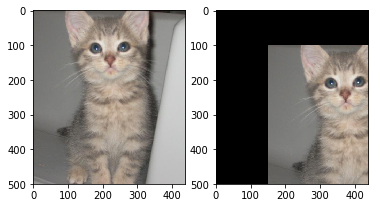

In [10]:
#shifting the x position and y position by pixels
M_translate = np.float32([[1,0,150],[0,1,100]])
img_translated = cv2.warpAffine(img,M_translate,(cols,rows))

figure, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(img_translated)
plt.show()

#### 2. Converting to Grayscale

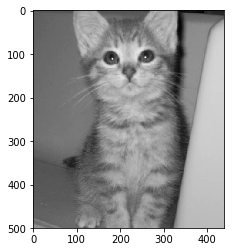

(500, 439)

In [11]:
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_grayscale,cmap='gray')
plt.show()
img_grayscale.shape

In [12]:
img_grayscale

array([[ 91,  91,  91, ...,  55,  55,  55],
       [ 92,  92,  92, ...,  54,  54,  54],
       [ 95,  95,  95, ...,  54,  54,  54],
       ...,
       [153, 152, 151, ..., 189, 190, 190],
       [153, 152, 151, ..., 189, 189, 190],
       [152, 152, 151, ..., 189, 189, 189]], dtype=uint8)

#### 3. Downsampling: shrinking the image resolution

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/43/Image_pyramid.svg/512px-Image_pyramid.svg.png", width=300>

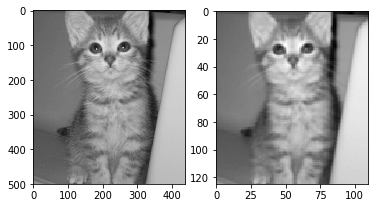

In [13]:
#used mainly to decrease the computation time
#resize by a factor of 4 (twice) using gaussian blur
img_resized = img_grayscale.copy()
for i in range(1,3):
        img_resized = cv2.pyrDown(img_resized)

figure, ax = plt.subplots(1,2)
ax[0].imshow(img_grayscale, 'gray')
ax[1].imshow(img_resized,'gray')
plt.show()

#### 4.Thresholding: generating a binary image 

In [14]:
#binary image
thval1,img_thr1 = cv2.threshold(img_grayscale,120,255,cv2.THRESH_BINARY)

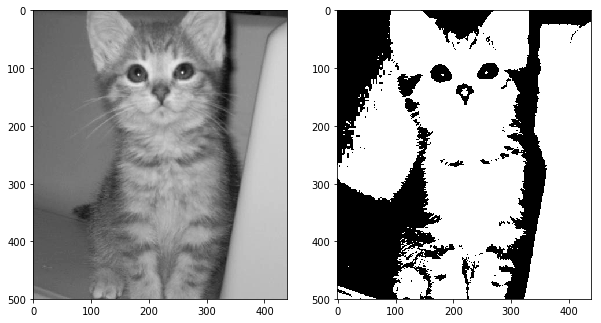

In [17]:
figure, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(img_grayscale, 'gray')
ax[1].imshow(img_thr1,'gray')
plt.show()

In [16]:
img_thr1

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)